# In this particular session, we will build different models on the Training Data and then go on to check the accuracy (or error) on the training and test data. The model which performs the best on the test data is an optimum model for us.

# Case Study - We are going to analyse and predict the monthly sales of a particular store. The data that we have ranges from 2013 to 2017.

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

## Read the data as a monthly Time Series from the '.csv' file.

In [15]:
df = pd.read_csv("2daily-total-female-births.csv")

## Here we will create a separate date range and then add it to the data instead of parsing the dates

In [16]:
df.head()

,Date,Births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [17]:
date = pd.date_range(start='1/1/1959', periods=len(df), freq='D')
date

DatetimeIndex(['1959-01-01', '1959-01-02', '1959-01-03', '1959-01-04',
               '1959-01-05', '1959-01-06', '1959-01-07', '1959-01-08',
               '1959-01-09', '1959-01-10',
               ...
               '1959-12-22', '1959-12-23', '1959-12-24', '1959-12-25',
               '1959-12-26', '1959-12-27', '1959-12-28', '1959-12-29',
               '1959-12-30', '1959-12-31'],
              dtype='datetime64[ns]', length=365, freq='D')

In [18]:
# by me
df['Time_Stamp'] = pd.DataFrame(date)
df.head()

,Date,Births,Time_Stamp
0,1959-01-01,35,1959-01-01
1,1959-01-02,32,1959-01-02
2,1959-01-03,30,1959-01-03
3,1959-01-04,31,1959-01-04
4,1959-01-05,44,1959-01-05


In [19]:
df['Time_Stamp'] = pd.DataFrame(date,columns=['Month'])
df.head()

,Date,Births,Time_Stamp
0,1959-01-01,35,1959-01-01
1,1959-01-02,32,1959-01-02
2,1959-01-03,30,1959-01-03
3,1959-01-04,31,1959-01-04
4,1959-01-05,44,1959-01-05


In [20]:
df.set_index('Time_Stamp',inplace=True,drop='Time_Stamp')
df.drop(labels='Date', axis=1, inplace=True)
df.head()

,Births
Time_Stamp,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


Now, we have our data ready for the Time Series Analysis.

## Plot the Time Series to understand the behaviour of the data

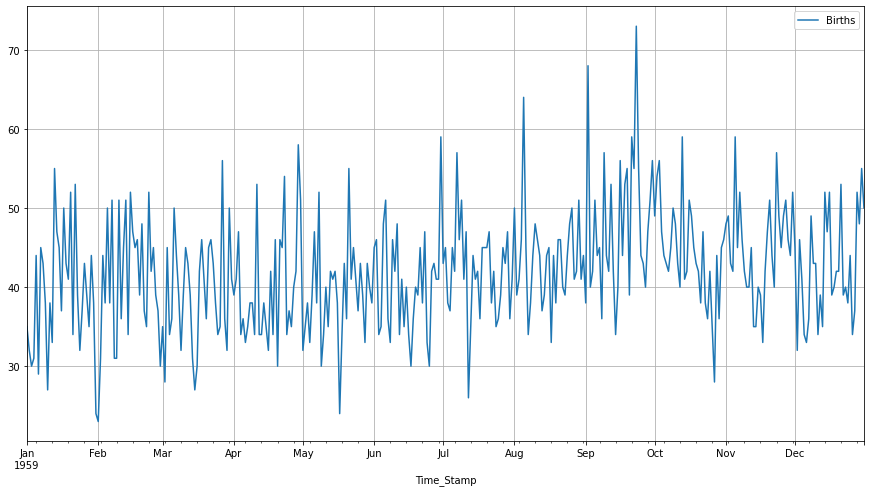

In [21]:
df.plot(grid=True);

In [22]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,8

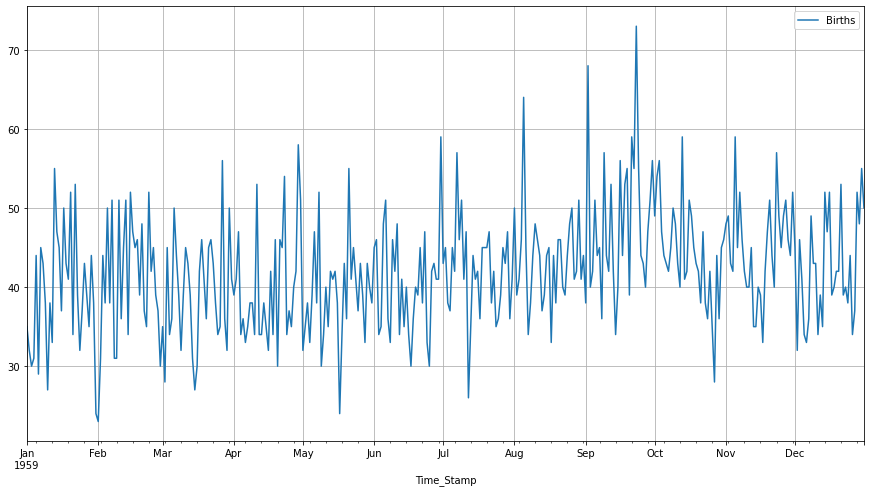

In [23]:
df.plot(grid=True);

## Check the basic measures of descriptive statistics of the Time Series

In [24]:
round(df.describe(),3)

,Births
count,365.000
mean,41.981
std,7.348
min,23.000
25%,37.000
50%,42.000
75%,46.000
max,73.000


Remember, the above measure is independent of the Time Series aspect. As in, it does not take into account the Time Stamped data.

## Split the data into train and test and plot the training and test data. [30% of the most recent data should be in the test set]

In [25]:
train    =   df[0:int(len(df)*0.7)] 
test     =   df[int(len(df)*0.7):]

In [26]:
print(train.shape)
print(test.shape)

(255, 1)
(110, 1)


In [27]:
from IPython.display import display

In [28]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


,Births
Time_Stamp,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


Last few rows of Training Data


,Births
Time_Stamp,
1959-09-08,36
1959-09-09,57
1959-09-10,44
1959-09-11,42
1959-09-12,53


First few rows of Test Data


,Births
Time_Stamp,
1959-09-13,42
1959-09-14,34
1959-09-15,40
1959-09-16,56
1959-09-17,44


Last few rows of Test Data


,Births
Time_Stamp,
1959-12-27,37
1959-12-28,52
1959-12-29,48
1959-12-30,55
1959-12-31,50


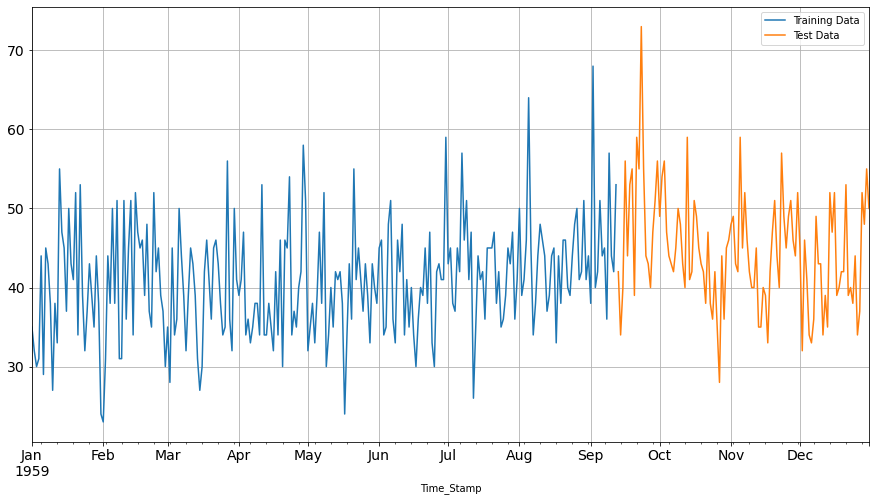

In [29]:
train['Births'].plot(fontsize=14)
test['Births'].plot(fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

##### Note: It is difficult to predict the future observations if such an instance has not happened in the past. From our train-test split we are predicting likewise behaviour as compared to the past years.

# Building different models and comparing the accuracy metrics.

## Model 1: Linear Regression

#### For this particular linear regression, we are going to regress the 'Births' variable against the order of the occurrence. For this we need to modify our training data before fitting it into a linear regression.

In [30]:
# time is our independent variable.

train_time = [i+1 for i in range(len(train))]
test_time = [i+256 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 21

We see that we have successfully the generated the numerical time instance order for both the training and test set. Now we will add these values in the training and test set.

In [31]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [32]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data')
display(LinearRegression_train.head())
print('Last few rows of Training Data')
display(LinearRegression_train.tail())
print('First few rows of Test Data')
display(LinearRegression_test.head())
print('Last few rows of Test Data')
display(LinearRegression_test.tail())

First few rows of Training Data


,Births,time
Time_Stamp,,
1959-01-01,35,1
1959-01-02,32,2
1959-01-03,30,3
1959-01-04,31,4
1959-01-05,44,5


Last few rows of Training Data


,Births,time
Time_Stamp,,
1959-09-08,36,251
1959-09-09,57,252
1959-09-10,44,253
1959-09-11,42,254
1959-09-12,53,255


First few rows of Test Data


,Births,time
Time_Stamp,,
1959-09-13,42,256
1959-09-14,34,257
1959-09-15,40,258
1959-09-16,56,259
1959-09-17,44,260


Last few rows of Test Data


,Births,time
Time_Stamp,,
1959-12-27,37,361
1959-12-28,52,362
1959-12-29,48,363
1959-12-30,55,364
1959-12-31,50,365


Now that our training and test data has been modified, let us go ahead use $\underline{Linear Regression}$ to build the model on the training data and test the model on the test data.

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
lr = LinearRegression()

In [36]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Births'])
# 2 [[]] in 'time' as the X parameter should be a data frame

LinearRegression()

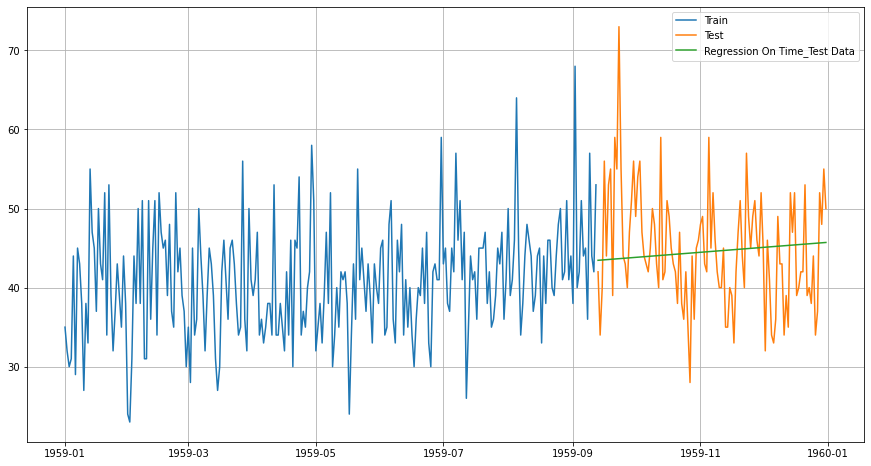

In [37]:
train_predictions_model1         = lr.predict(LinearRegression_train[['time']])
LinearRegression_train['RegOnTime'] = train_predictions_model1

test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.plot( train['Births'], label='Train')
plt.plot(test['Births'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.legend(loc='best')
plt.grid();

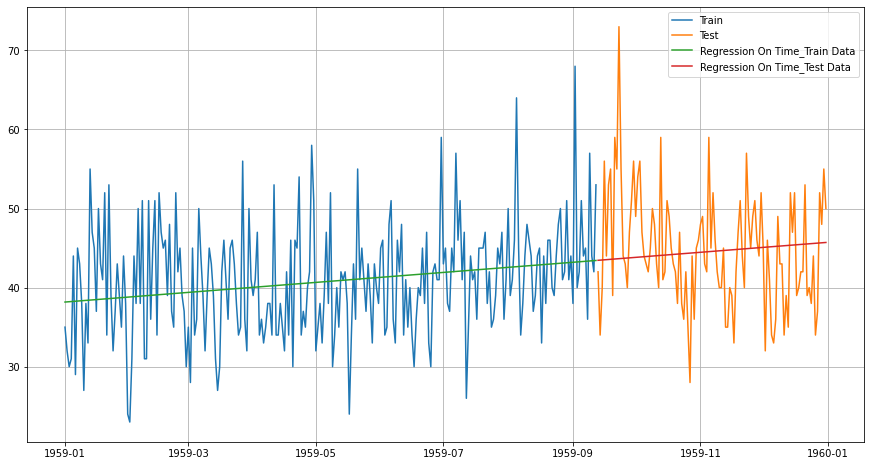

In [38]:
# by me
train_predictions_model1         = lr.predict(LinearRegression_train[['time']])
LinearRegression_train['RegOnTime'] = train_predictions_model1

test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.plot( train['Births'], label='Train')
plt.plot(test['Births'], label='Test')
plt.plot(LinearRegression_train['RegOnTime'], label='Regression On Time_Train Data')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.legend(loc='best')
plt.grid();

#### Defining the functions for calculating the accuracy metrics.

In [39]:
from sklearn import metrics

### Model Evaluation

In [40]:
rmse_model1_test = metrics.mean_squared_error(test['Births'],test_predictions_model1,squared=False)
# squared=False calculates root mean squared error(RMSE) instead of MSE

print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f " %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 7.392 


In [41]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf

,Test RMSE
RegressionOnTime,7.391597


## Model 2: Naive Approach: $\hat{y}_{t+1} = y_t$

#### For this particular naive model, we say that the prediction for tomorrow is the same as today and the prediction for day after tomorrow is tomorrow and since the prediction of tomorrow is same as today,therefore the prediction for day after tomorrow is also today.

In [46]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [47]:
train.tail()

,Births
Time_Stamp,
1959-09-08,36
1959-09-09,57
1959-09-10,44
1959-09-11,42
1959-09-12,53


In [49]:
NaiveModel_test['naive'] = 53    # by me
#NaiveModel_test['naive'] = np.asarray(train['Births'])[len(np.asarray(train['Births']))-1]    # by great learning
#NaiveModel_test['naive'] = train['Births'][len(np.asarray(train['Births']))-1]          # by me
NaiveModel_test['naive'].head()

Time_Stamp
1959-09-13    53
1959-09-14    53
1959-09-15    53
1959-09-16    53
1959-09-17    53
Name: naive, dtype: int64

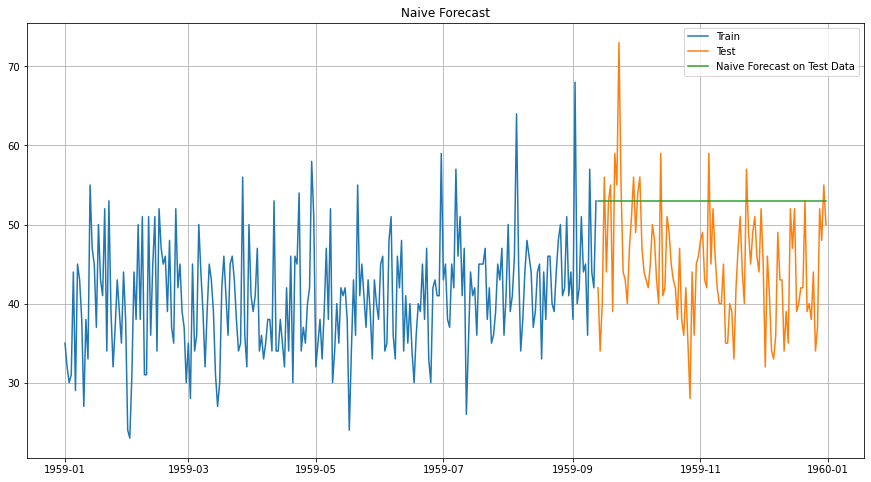

In [50]:
plt.plot(NaiveModel_train['Births'], label='Train')
plt.plot(test['Births'], label='Test')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

### Model Evaluation

In [51]:
rmse_model2_test = metrics.mean_squared_error(test['Births'],NaiveModel_test['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 10.984


In [52]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

,Test RMSE
RegressionOnTime,7.391597
NaiveModel,10.984286


## Method 3: Simple Average

#### For this particular simple average method, we will forecast by using the average of the training values.

In [53]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [54]:
SimpleAverage_test['mean_forecast'] = train['Births'].mean()
SimpleAverage_test.head()

,Births,mean_forecast
Time_Stamp,,
1959-09-13,42,40.803922
1959-09-14,34,40.803922
1959-09-15,40,40.803922
1959-09-16,56,40.803922
1959-09-17,44,40.803922


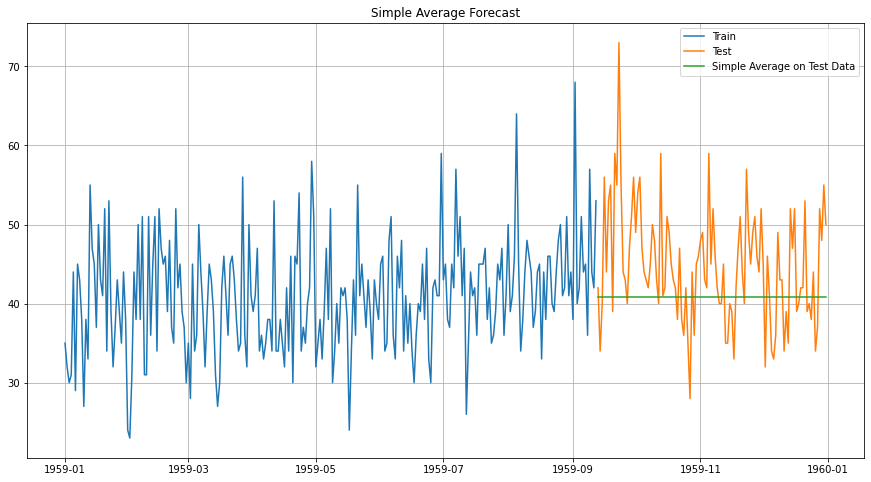

In [55]:
plt.plot(SimpleAverage_train['Births'], label='Train')
plt.plot(SimpleAverage_test['Births'], label='Test')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

### Model Evaluation

In [56]:
rmse_model3_test = metrics.mean_squared_error(test['Births'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 8.195


In [57]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]}
                           ,index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

,Test RMSE
RegressionOnTime,7.391597
NaiveModel,10.984286
SimpleAverageModel,8.195469


## Method 4: Moving Average(MA)

#### For the moving average model, we are going to calculate rolling means (or moving averages) for different intervals. The best interval can be determined by the maximum accuracy (or the minimum error) over here.

###### For Moving Average, we are going to average over the entire data.

In [58]:
MovingAverage = df.copy()
MovingAverage.head()

,Births
Time_Stamp,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


#### Trailing moving averages

In [60]:
MovingAverage['Trailing_2'] = MovingAverage['Births'].rolling(2).mean()   # window of 2
MovingAverage['Trailing_4'] = MovingAverage['Births'].rolling(4).mean()   # window of 4
MovingAverage['Trailing_6'] = MovingAverage['Births'].rolling(6).mean()   # window of 6
MovingAverage['Trailing_9'] = MovingAverage['Births'].rolling(9).mean()   # window of 9

MovingAverage.head(50)

,Births,Trailing_2,Trailing_4,Trailing_6,Trailing_9
Time_Stamp,,,,,
1959-01-01,35,NaN,NaN,NaN,NaN
1959-01-02,32,33.5,NaN,NaN,NaN
1959-01-03,30,31.0,NaN,NaN,NaN
1959-01-04,31,30.5,32.00,NaN,NaN
1959-01-05,44,37.5,34.25,NaN,NaN
1959-01-06,29,36.5,33.50,33.500000,NaN
1959-01-07,45,37.0,37.25,35.166667,NaN
1959-01-08,43,44.0,40.25,37.000000,NaN
1959-01-09,38,40.5,38.75,38.333333,36.333333


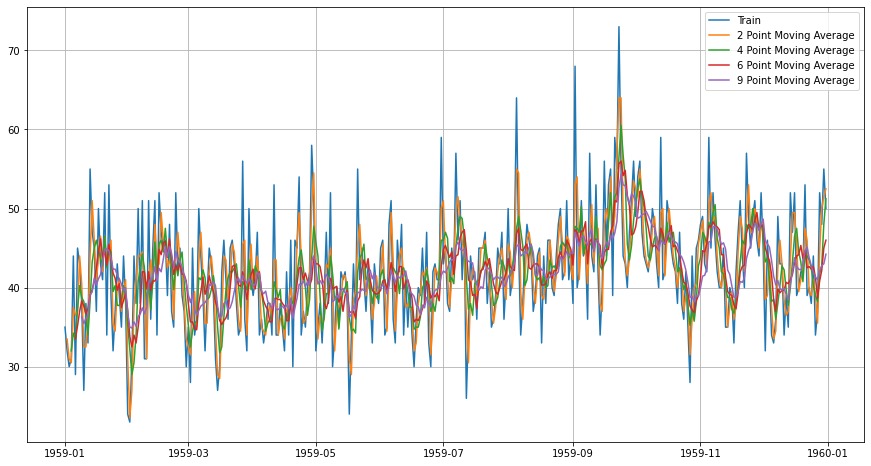

In [61]:
## Plotting on the whole data

plt.plot(MovingAverage['Births'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

Let us split the data into train and test and plot this Time Series. The window of the moving average is need to be carefully selected as too big a window will result in not having any test set as the whole series might get averaged over.

In [62]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[0:int(len(MovingAverage)*0.7)] 
trailing_MovingAverage_test=MovingAverage[int(len(MovingAverage)*0.7):]

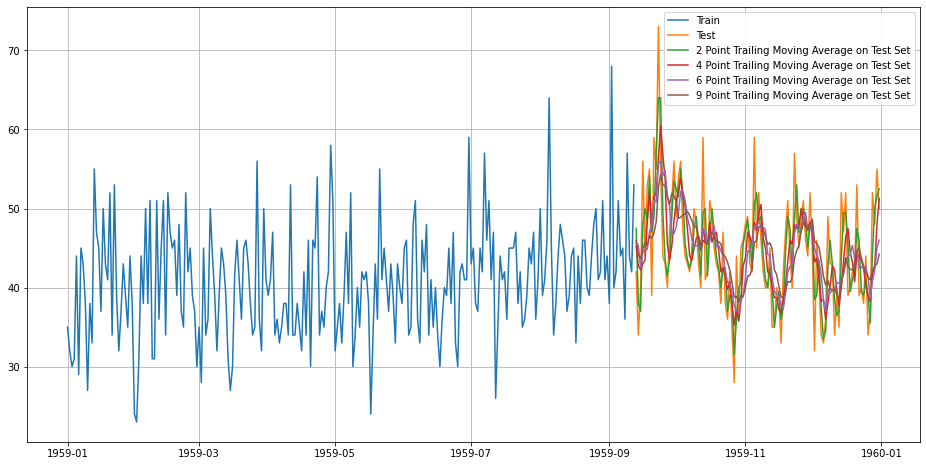

In [63]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Births'], label='Train')
plt.plot(trailing_MovingAverage_test['Births'], label='Test')


plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')

plt.legend(loc = 'best')
plt.grid();

### Model Evaluation

##### Done only on the test data.

In [64]:
## Test Data - RMSE  --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test['Births'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test['Births'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['Births'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test['Births'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 4.158
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 5.531
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 6.109
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 6.502


In [65]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

,Test RMSE
RegressionOnTime,7.391597
NaiveModel,10.984286
SimpleAverageModel,8.195469
2pointTrailingMovingAverage,4.157961
4pointTrailingMovingAverage,5.531470
6pointTrailingMovingAverage,6.109316
9pointTrailingMovingAverage,6.502145


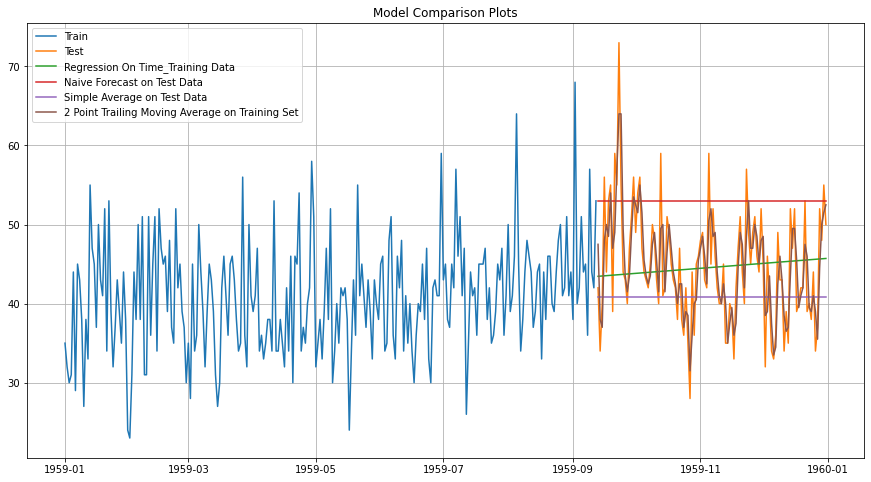

In [78]:
## Plotting on both Training and Test data

plt.plot(train['Births'], label='Train')
plt.plot(test['Births'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Training Data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

# END